<h2 align="center">Structured Tram Network - Visualisation and Trajectory Heatmap</h2>

***

In [374]:
import ast
import re
import folium
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import shapely.wkt
import shapely.geometry
import traj_dist.distance
from shapely.geometry import LineString
from branca.element import Figure


In [375]:
import warnings
warnings.filterwarnings("ignore")

In [376]:
# importing entire dataset with pd.read_csv

nodes=pd.read_csv('datasets/tram_nodes_ams.csv')
nodes=nodes.drop(columns=['Lijn', 'Column1', 'Label'])
nodes=nodes.dropna()
 
links=pd.read_csv('datasets/tram_links_ams.csv')
links=links.drop(columns=['Lijn', 'Column1'])
links=links.dropna()

In [377]:
type(links['WKT_LNG_LAT'])

pandas.core.series.Series

In [378]:
len(links['Lijn_select'][129])

5

In [379]:
pointlist=nodes['WKT_LAT_LNG'].values.tolist()
points=[]
pointsv2=[]

for x in pointlist[:-1]:
    points.append((x.replace("POINT", "")))

    for i in points:
        #pointsv2.append(ast.literal_eval(k))
        pointsv2.append(ast.literal_eval(re.sub("\s+", ",", i.strip())))
        


In [380]:
linksmetro=(links.loc[(links['Modaliteit'] == 'Metro')])
cond = links['Modaliteit'].isin(linksmetro['Modaliteit'])
links.drop(links[cond].index, inplace = True)
links.drop_duplicates()
links.reset_index(drop=True, inplace=True)
links.to_csv('tramlinks.csv')

nodesmetro=(nodes.loc[(nodes['Modaliteit'] == 'Metro')])
cond = nodes['Modaliteit'].isin(nodesmetro['Modaliteit'])
nodes.drop(nodes[cond].index, inplace = True)
nodes.drop_duplicates()
nodes.reset_index(drop=True, inplace=True)
nodes.to_csv('nodelinks.csv')


In [381]:
lines=links['Lijn_select'].values.tolist()

In [382]:
line_string=links['WKT_LNG_LAT'].tolist()
point=nodes['WKT_LNG_LAT'].tolist()


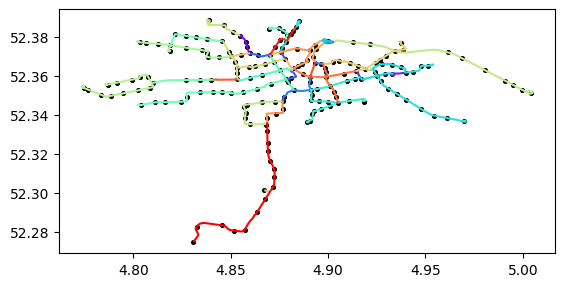

In [383]:
m = folium.Map(width=1000,height=700,location=[52.350216, 4.895168],tiles='cartodbdark_matter', zoom_start=12)

rainbow= plt.get_cmap('rainbow')
color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

gs_ls= pd.DataFrame({'' : []})
ax = gs_ls.plot()

for i in range(len(line_string)):
    gs_ls = gpd.GeoSeries(pd.Series(line_string[i]).apply(shapely.wkt.loads), crs="epsg:4326")
    
    folium.Choropleth(
        gs_ls[gs_ls.geometry.length>0.001],
        line_weight=3,
    ).add_to(m)
    
    # matplotlib
    ax = gs_ls.plot(ax=ax, color=matplotlib.colors.to_hex(color[i].tolist()))
    
    # folium
    m=gs_ls.explore(m=m,color=matplotlib.colors.to_hex(color[i].tolist()), name='Line'+str(lines[i]))
    


gs_p = gpd.GeoSeries(pd.Series(point).apply(shapely.wkt.loads))

m=gs_p.explore(m=m, color='#000000', marker_kwds={'radius':3, 'fill':False})
folium.LayerControl().add_to(m)

ax = gs_p.plot(ax=ax, markersize=7, color='black')
ax.get_legend().remove()


In [384]:
m


In [385]:
for index, row in links.iterrows():
    
    if len(row['Lijn_select'])<3:
        count=1
    elif len(row['Lijn_select'])<6:
        count=2
    elif len(row['Lijn_select'])<9:
        count=3
    elif len(row['Lijn_select'])<12:
        count=4
        
    links.at[index,'count']=count
links
links.to_csv('count_tram_links.csv')


In [386]:
links

,OBJECTNUMMER,Modaliteit,Lijn_select,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,count
0,1.0,Tram,19,"LINESTRING(4.854869 52.380563,4.855431 52.3802...","LINESTRING(52.380563 4.854869,52.38023 4.85543...",4.857418,52.376031,1.0
1,2.0,Tram,07,"LINESTRING(4.877699 52.368732,4.877821 52.3687...","LINESTRING(52.368732 4.877699,52.368747 4.8778...",4.877937,52.368685,1.0
2,3.0,Tram,_,"LINESTRING(4.878623 52.378394,4.877972 52.378549)","LINESTRING(52.378394 4.878623,52.378549 4.877972)",4.878298,52.378472,1.0
3,4.0,Tram,04|14|24,"LINESTRING(4.902245 52.377263,4.902291 52.3773...","LINESTRING(52.377263 4.902245,52.377363 4.9022...",4.902240,52.377431,3.0
4,5.0,Tram,01,"LINESTRING(4.91432 52.362487,4.914466 52.36248...","LINESTRING(52.362487 4.91432,52.362486 4.91446...",4.915482,52.360833,1.0
...,...,...,...,...,...,...,...,...
115,139.0,Tram,_,"LINESTRING(4.8778057 52.3788361,4.877795 52.37...","LINESTRING(52.3788361 4.8778057,52.378812 4.87...",4.877874,52.378693,1.0
116,140.0,Tram,03,"LINESTRING(4.8773923 52.3787214,4.8775231 52.3...","LINESTRING(52.3787214 4.8773923,52.378718 4.87...",4.877599,52.378777,1.0
117,141.0,Tram,05,"LINESTRING(4.8820335 52.3830391,4.881058 52.38...","LINESTRING(52.3830391 4.8820335,52.381498 4.88...",4.880595,52.380771,1.0
118,142.0,Tram,05|25,"LINESTRING(4.870626 52.3011361,4.871682 52.302...","LINESTRING(52.3011361 4.870626,52.302725 4.871...",4.870675,52.318668,2.0


In [387]:
# identify tram lines which have overlaying segments
singlelines=[]
insel_sl=[]
for index, row in links.iterrows():
    
     if len(row['Lijn_select'])<3:
         singlelines.append(re.findall(r'\d+', (row['Lijn_select'])))
         insel_sl.append(index)


singlelines = [item for sublist in singlelines for item in sublist]
singlelines = list(set(singlelines))
singlelines
# all tram lines have overlaying segments (15) which corresponds to the total number of tram lines in amsterdam

['13',
 '24',
 '02',
 '01',
 '03',
 '14',
 '05',
 '25',
 '07',
 '04',
 '19',
 '17',
 '12',
 '26']

In [388]:
# select rows of single lines at segments
singlelks = links.iloc[insel_sl]
singlelks

,OBJECTNUMMER,Modaliteit,Lijn_select,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,count
0,1.0,Tram,19,"LINESTRING(4.854869 52.380563,4.855431 52.3802...","LINESTRING(52.380563 4.854869,52.38023 4.85543...",4.857418,52.376031,1.0
1,2.0,Tram,07,"LINESTRING(4.877699 52.368732,4.877821 52.3687...","LINESTRING(52.368732 4.877699,52.368747 4.8778...",4.877937,52.368685,1.0
2,3.0,Tram,_,"LINESTRING(4.878623 52.378394,4.877972 52.378549)","LINESTRING(52.378394 4.878623,52.378549 4.877972)",4.878298,52.378472,1.0
4,5.0,Tram,01,"LINESTRING(4.91432 52.362487,4.914466 52.36248...","LINESTRING(52.362487 4.91432,52.362486 4.91446...",4.915482,52.360833,1.0
5,6.0,Tram,01,"LINESTRING(4.932206 52.36121,4.932321 52.36116...","LINESTRING(52.36121 4.932206,52.361162 4.93232...",4.933146,52.360695,1.0
...,...,...,...,...,...,...,...,...
114,138.0,Tram,03,"LINESTRING(4.8773923 52.3787214,4.876831 52.37...","LINESTRING(52.3787214 4.8773923,52.378874 4.87...",4.873885,52.374824,1.0
115,139.0,Tram,_,"LINESTRING(4.8778057 52.3788361,4.877795 52.37...","LINESTRING(52.3788361 4.8778057,52.378812 4.87...",4.877874,52.378693,1.0
116,140.0,Tram,03,"LINESTRING(4.8773923 52.3787214,4.8775231 52.3...","LINESTRING(52.3787214 4.8773923,52.378718 4.87...",4.877599,52.378777,1.0
117,141.0,Tram,05,"LINESTRING(4.8820335 52.3830391,4.881058 52.38...","LINESTRING(52.3830391 4.8820335,52.381498 4.88...",4.880595,52.380771,1.0


In [389]:
singlelks['Lijn_select'].unique()

array(['19', '07', '_', '01', '03', '26', '17', '13', '24', '14', '05',
       '12', '04', '02', '25'], dtype=object)

In [390]:

# identify tram lines which have overlaying segments
multilines=[]
insel=[]
for index, row in links.iterrows():
    
     if len(row['Lijn_select'])>2:
         multilines.append(re.findall(r'\d+', (row['Lijn_select'])))
         insel.append(index)


multilines = [item for sublist in multilines for item in sublist]
multilines = list(set(multilines))
multilines
# all tram lines have overlaying segments (15) which corresponds to the total number of tram lines in amsterdam



['13',
 '24',
 '02',
 '01',
 '14',
 '26',
 '05',
 '27',
 '25',
 '07',
 '04',
 '19',
 '17',
 '12',
 '03']

In [391]:
# select rows of overlaying lines at multiline segments
multilks = links.iloc[insel]
multilks

,OBJECTNUMMER,Modaliteit,Lijn_select,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,count
3,4.0,Tram,04|14|24,"LINESTRING(4.902245 52.377263,4.902291 52.3773...","LINESTRING(52.377263 4.902245,52.377363 4.9022...",4.902240,52.377431,3.0
10,12.0,Tram,05|17|19,"LINESTRING(4.875852 52.372026,4.875865 52.3719...","LINESTRING(52.372026 4.875852,52.371908 4.8758...",4.876866,52.370533,3.0
11,13.0,Tram,05|19,"LINESTRING(4.877879 52.36904,4.878176 52.368623)","LINESTRING(52.36904 4.877879,52.368623 4.878176)",4.878027,52.368831,2.0
13,15.0,Tram,05|12,"LINESTRING(4.87872 52.357935,4.878687 52.35801...","LINESTRING(52.357935 4.87872,52.358019 4.87868...",4.878788,52.358086,2.0
14,16.0,Tram,02|05|12,"LINESTRING(4.880841 52.363063,4.880747 52.3629...","LINESTRING(52.363063 4.880841,52.362986 4.8807...",4.881254,52.360650,3.0
15,17.0,Tram,13|19,"LINESTRING(4.859967 52.371499,4.860656 52.3713...","LINESTRING(52.371499 4.859967,52.371363 4.8606...",4.864985,52.370744,2.0
19,21.0,Tram,05|24,"LINESTRING(4.876902 52.347097,4.877182 52.3488...","LINESTRING(52.347097 4.876902,52.348892 4.8771...",4.879528,52.349896,2.0
21,23.0,Tram,03|12|24,"LINESTRING(4.882724 52.352786,4.883008 52.3526...","LINESTRING(52.352786 4.882724,52.352685 4.8830...",4.886768,52.352508,3.0
22,24.0,Tram,04|12,"LINESTRING(4.904905 52.346245,4.904158 52.346137)","LINESTRING(52.346245 4.904905,52.346137 4.904158)",4.904532,52.346191,2.0
23,25.0,Tram,04|14,"LINESTRING(4.893539 52.367109,4.893579 52.3670...","LINESTRING(52.367109 4.893539,52.367031 4.8935...",4.895315,52.366676,2.0


In [397]:
linecomp=[]
i=0
index_dict = {}
index_multi= []
index_single=[]
m = folium.Map( location=[52.350216, 4.895168] ,tiles='cartodbdark_matter', zoom_start=12)

rainbow= plt.get_cmap('rainbow')
color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

selection_appending=singlelks

for i in multilines:
     linecomp= (re.findall(r'\d+', i)) #detects number strings and stored as list of string
     
     for idx, elem in enumerate(linecomp):
          
          q = links[links['Lijn_select'].str.contains(elem)] #find all line segments corresponding to tram line
          total_traj=gpd.GeoSeries(pd.Series(q['WKT_LNG_LAT']).apply(shapely.wkt.loads), crs="epsg:4326")
          total_length= sum(total_traj.length)

          batch=[]
          for i in q['Lijn_select']:
               batch.append((re.findall(r'\d+', i))) #detects number strings and stored as list of string
          
          batch = [item for sublist in batch for item in sublist] #flatten list of lists
          batch = [i for i in batch if i != elem] #remove elem of interest
          batch=list(set(batch)) #remove duplicates

          for subel in batch:               

               df_q = pd.DataFrame()
               i = 0
               for idx, line in enumerate(links['Lijn_select']):

                    if subel in line.split('|') and elem in line.split('|'):
          
                         q_subel = links.iloc[idx]
                         df_q = df_q.append(q_subel,ignore_index=True)
                         
               q_subel = df_q.copy()
               
               subel_traj=gpd.GeoSeries(pd.Series(q_subel['WKT_LNG_LAT']).apply(shapely.wkt.loads), crs="epsg:4326")
               subel_length= sum(subel_traj.length)     
               percent= subel_length/total_length
               
               if percent==1:
                    selection_appending=selection_appending[selection_appending.Lijn_select != subel]
                    print(elem, subel, percent*100)
                    print(q_subel)                   

          # stop

          # q_elem= singlelks[singlelks['Lijn_select'].str.contains(elem)]
          # elem_traj=gpd.GeoSeries(pd.Series(q_elem['WKT_LNG_LAT']).apply(shapely.wkt.loads), crs="epsg:4326")
          # elem_length= sum(elem_traj.length)
          
          # m=total_traj.explore(m=m, color='yellow', style_kwds={'opacity':1})
          # m=elem_traj.explore(m=m, color='red', style_kwds={'opacity':0.4})

          

27 17 100.0
   OBJECTNUMMER Modaliteit Lijn_select  \
0          62.0       Tram    01|17|27   
1          78.0       Tram       17|27   
2         128.0       Tram    01|17|27   
3         129.0       Tram    01|17|27   

                                         WKT_LNG_LAT  \
0  LINESTRING(4.84392 52.357998,4.843596 52.35795...   
1  LINESTRING(4.809887 52.35635,4.809739 52.35633...   
2  LINESTRING(4.850743 52.3580589,4.846919 52.358...   
3  LINESTRING(4.850743 52.3580589,4.852064 52.358...   

                                         WKT_LAT_LNG       LNG        LAT  \
0  LINESTRING(52.357998 4.84392,52.357951 4.84359...  4.826904  52.357174   
1  LINESTRING(52.35635 4.809887,52.356335 4.80973...  4.797740  52.357936   
2  LINESTRING(52.3580589 4.850743,52.358032 4.846...  4.845874  52.358072   
3  LINESTRING(52.3580589 4.850743,52.358063 4.852...  4.852076  52.358141   

   count  
0    3.0  
1    2.0  
2    3.0  
3    3.0  


In [404]:
linecomp=[]
i=0
index_dict = {}
index_multi= []
index_single=[]

m = folium.Map( location=[52.350216, 4.895168] ,tiles='cartodbdark_matter', zoom_start=12)

rainbow= plt.get_cmap('rainbow')
color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

selection_appending_V2=selection_appending

for i in multilines:
     linecomp= (re.findall(r'\d+', i)) #detects number and stored as string
     
     for idx, elem in enumerate(linecomp):

          #if elem not in links['Lijn_select'].unique():
          #     continue
          
          q = links[links['Lijn_select'].str.contains(elem)] #find all line segments corresponding to tram line
          total_traj=gpd.GeoSeries(pd.Series(q['WKT_LNG_LAT']).apply(shapely.wkt.loads), crs="epsg:4326")
          total_length= sum(total_traj.length)

          q_common = multilks[multilks['Lijn_select'].str.contains(elem)]
          common_traj=gpd.GeoSeries(pd.Series(q_common['WKT_LNG_LAT']).apply(shapely.wkt.loads), crs="epsg:4326")
          common_length= sum(common_traj.length)

          percent_c= common_length/total_length
               
          if percent_c>0.6:
               print(q_common)
               selection_appending_V2=selection_appending_V2[selection_appending_V2.Lijn_select != elem]
               print(elem, percent_c*100)
                    

     OBJECTNUMMER Modaliteit  Lijn_select  \
10           12.0       Tram     05|17|19   
11           13.0       Tram        05|19   
13           15.0       Tram        05|12   
14           16.0       Tram     02|05|12   
19           21.0       Tram        05|24   
50           54.0       Tram     03|05|12   
87          101.0       Tram  01|02|05|12   
88          103.0       Tram     05|07|19   
96          113.0       Tram        05|25   
118         142.0       Tram        05|25   

                                           WKT_LNG_LAT  \
10   LINESTRING(4.875852 52.372026,4.875865 52.3719...   
11    LINESTRING(4.877879 52.36904,4.878176 52.368623)   
13   LINESTRING(4.87872 52.357935,4.878687 52.35801...   
14   LINESTRING(4.880841 52.363063,4.880747 52.3629...   
19   LINESTRING(4.876902 52.347097,4.877182 52.3488...   
50   LINESTRING(4.882162 52.353055,4.881564 52.3539...   
87   LINESTRING(4.882348 52.363775,4.880841 52.363063)   
88   LINESTRING(4.882348 52.363775,4.882

In [401]:
mapit = folium.Map( location=[52.350216, 4.895168] ,tiles='cartodbdark_matter', zoom_start=11)

traj_B = np.array(np.concatenate(q))
traj_A = np.array(np.concatenate(q_common))

acoord=list(map(tuple, traj_A))
acoord = [(sub[1], sub[0]) for sub in acoord]

bcoord= list(map(tuple, traj_B))
bcoord = [(sub[1], sub[0]) for sub in bcoord]

folium.PolyLine(acoord,opacity=0.8, color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 , alpha=0.5).add_to( mapit )
folium.PolyLine(bcoord,dash_array='10', color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 ).add_to( mapit )


KeyError: 0

In [352]:
list(set(selection_appending['Lijn_select'].values.tolist()))


['13',
 '24',
 '_',
 '02',
 '01',
 '14',
 '26',
 '05',
 '25',
 '07',
 '04',
 '19',
 '17',
 '12',
 '03']

In [353]:
list(set(singlelks['Lijn_select'].values.tolist()))


['13',
 '24',
 '_',
 '02',
 '01',
 '14',
 '26',
 '05',
 '25',
 '07',
 '04',
 '19',
 '17',
 '12',
 '03']

In [ ]:
for idx, line in enumerate(links['Lijn_select']):
    #print(line.split('|'))
    if '04' in line.split('|') and '14' in line.split('|'):
        print(line)

In [ ]:
links.iloc[idx]

In [ ]:
q_subel

In [ ]:
f'{subel}|{elem}'

In [ ]:
links['Lijn_select']

In [ ]:
batch=[]
for i in q['Lijn_select']:

     batch.append((re.findall(r'\d+', i))) #detects number strings and stored as list of string
batch
batch = [item for sublist in batch for item in sublist]
batch = [i for i in batch if i != '13']
batch=list(set(batch))
batch
elem

In [ ]:
selection_appending

In [ ]:
                     bcoord= list(map(tuple, traj_B))
                     bcoord = [(sub[1], sub[0]) for sub in bcoord]
                    #for coord in bcoord:
                     folium.PolyLine(bcoord, color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 ).add_to( mapit )

                     
                    #  index_multi.append(index)
                    #  index_single.append(singlelks.index[singlelks['Lijn_select'].str.contains(elem)].tolist())

mapit

In [ ]:
#sorting with minimum
# linecomp=[]
# i=0
# index_dict = {}
# index_multi= []
# index_single=[]
# mapit = None
# mapit = folium.Map( location=[52.350216, 4.895168] ,tiles='cartodbdark_matter', zoom_start=11)

# rainbow= plt.get_cmap('rainbow')
# color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

# for index, row in singlelks.iterrows(): #select tram lines independently
     
#      #Q = shapely.wkt.loads(row['WKT_LNG_LAT']) 
#      linecomp= (re.findall(r'\d+', (row['Lijn_select']))) #detects number strings and stored as list of string
#      #traj_A = np.array(Q.xy) 
#      #traj_At = np.transpose(traj_A)
     
#      q_all = {}
#      pct_list = []
#      for idx, elem in enumerate(linecomp):
#           if elem not in links['Lijn_select'].unique():
#                continue
          
#           q = links[links['Lijn_select'].str.contains(elem)] #find all line segments corresponding to tram line

#           q_comb = []          
          
#           for i, row in q.iterrows():
#                #print(i)
#                q_shapely = shapely.wkt.loads(row['WKT_LNG_LAT'])
#                q_comb.append(q_shapely)

#           if len(q_comb) > 0: #to ensure no empty q_comb
#                q_comb_np = np.concatenate(q_comb)
#                q_all[elem] = q_comb_np     
#                traj_B = np.array(q_comb_np)

#                percent= traj_dist.distance.sspd(traj_At, traj_B)
#                #print(percent)
#                if percent<0.009:
#                      pct_list.append(elem)
                    
#                     #plot
#                      acoord=list(map(tuple, traj_At))
#                      acoord = [(sub[1], sub[0]) for sub in acoord]

#                      bcoord= list(map(tuple, traj_B))
#                      bcoord = [(sub[1], sub[0]) for sub in bcoord]
#                     #for coord in bcoord:
#                      folium.PolyLine(acoord,opacity=0.8, color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 , alpha=0.5).add_to( mapit )
#                      folium.PolyLine(bcoord,dash_array='10', color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 ).add_to( mapit )
#                      i=i+1

                     
#                     #  index_multi.append(index)
#                     #  index_single.append(singlelks.index[singlelks['Lijn_select'].str.contains(elem)].tolist())
#           index_dict[str(linecomp)] = pct_list

# mapit


In [ ]:
linecomp=[]
i=0
index_dict = {}
index_multi= []
index_single=[]
mapit = None
mapit = folium.Map( location=[52.350216, 4.895168] ,tiles='cartodbdark_matter', zoom_start=11)

rainbow= plt.get_cmap('rainbow')
color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

for index, row in multilks.iterrows():
     
     Q = shapely.wkt.loads(row['WKT_LNG_LAT']) 
     linecomp= (re.findall(r'\d+', (row['Lijn_select'])))
     traj_A = np.array(Q.xy) 
     traj_At = np.transpose(traj_A)
     
     #break
     q_all = {}
     pct_list = []
     for idx, elem in enumerate(linecomp):
          if elem not in singlelks['Lijn_select'].unique():
               continue
          
          q = singlelks[singlelks['Lijn_select'].str.contains(elem)]

          q_comb = []          
          
          for i, row in q.iterrows():
               #print(i)
               q_shapely = shapely.wkt.loads(row['WKT_LNG_LAT'])
               q_comb.append(q_shapely)
          # if not q_comb:
          #      print(idx, len(q), elem)

          if len(q_comb) > 0:
               q_comb_np = np.concatenate(q_comb)
               q_all[elem] = q_comb_np     
               traj_B = np.array(q_comb_np)

               percent= traj_dist.distance.sspd(traj_At, traj_B) #/ LineString(np.squeeze(q_comb_np)).length
               print(percent)
               if percent<0.009:
                     pct_list.append(elem)
                    
                     acoord=list(map(tuple, traj_At))
                     acoord = [(sub[1], sub[0]) for sub in acoord]

                     bcoord= list(map(tuple, traj_B))
                     bcoord = [(sub[1], sub[0]) for sub in bcoord]
                    #for coord in bcoord:
                     folium.PolyLine(acoord,opacity=0.8, color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 , alpha=0.5).add_to( mapit )
                     folium.PolyLine(bcoord,dash_array='10', color=matplotlib.colors.to_hex(color[i].tolist()), radius=8 ).add_to( mapit )
                     i=i+1

                     
                    #  index_multi.append(index)
                    #  index_single.append(singlelks.index[singlelks['Lijn_select'].str.contains(elem)].tolist())
          index_dict[str(linecomp)] = pct_list

mapit

#traj_A
#row

In [ ]:
index_dict

In [ ]:
q_subel

In [ ]:
coord[1]

In [ ]:
m = folium.Map(width=1000,height=700,location=[52.350216, 4.895168],tiles='cartodbdark_matter', zoom_start=12)

rainbow= plt.get_cmap('rainbow')
color = cm.rainbow(np.linspace(0, 1,len(line_string))) #create as many colors as there are itineraries

gs_ls= pd.DataFrame({'' : []})
ax = gs_ls.plot()

for i in range(len(line_string)):
    gs_ls = gpd.GeoSeries(pd.Series(line_string[i]).apply(shapely.wkt.loads), crs="epsg:4326")
    
    folium.Choropleth(
        gs_ls[gs_ls.geometry.length>0.001],
        line_weight=3,
    ).add_to(m)
    
    # matplotlib
    ax = gs_ls.plot(ax=ax, color=matplotlib.colors.to_hex(color[i].tolist()))
    
    # folium
    m=gs_ls.explore(m=m,color=matplotlib.colors.to_hex(color[i].tolist()), name='Line'+str(lines[i]))
    


gs_p = gpd.GeoSeries(pd.Series(point).apply(shapely.wkt.loads))

m=gs_p.explore(m=m, color='#000000', marker_kwds={'radius':3, 'fill':False})
folium.LayerControl().add_to(m)

ax = gs_p.plot(ax=ax, markersize=7, color='black')
ax.get_legend().remove()

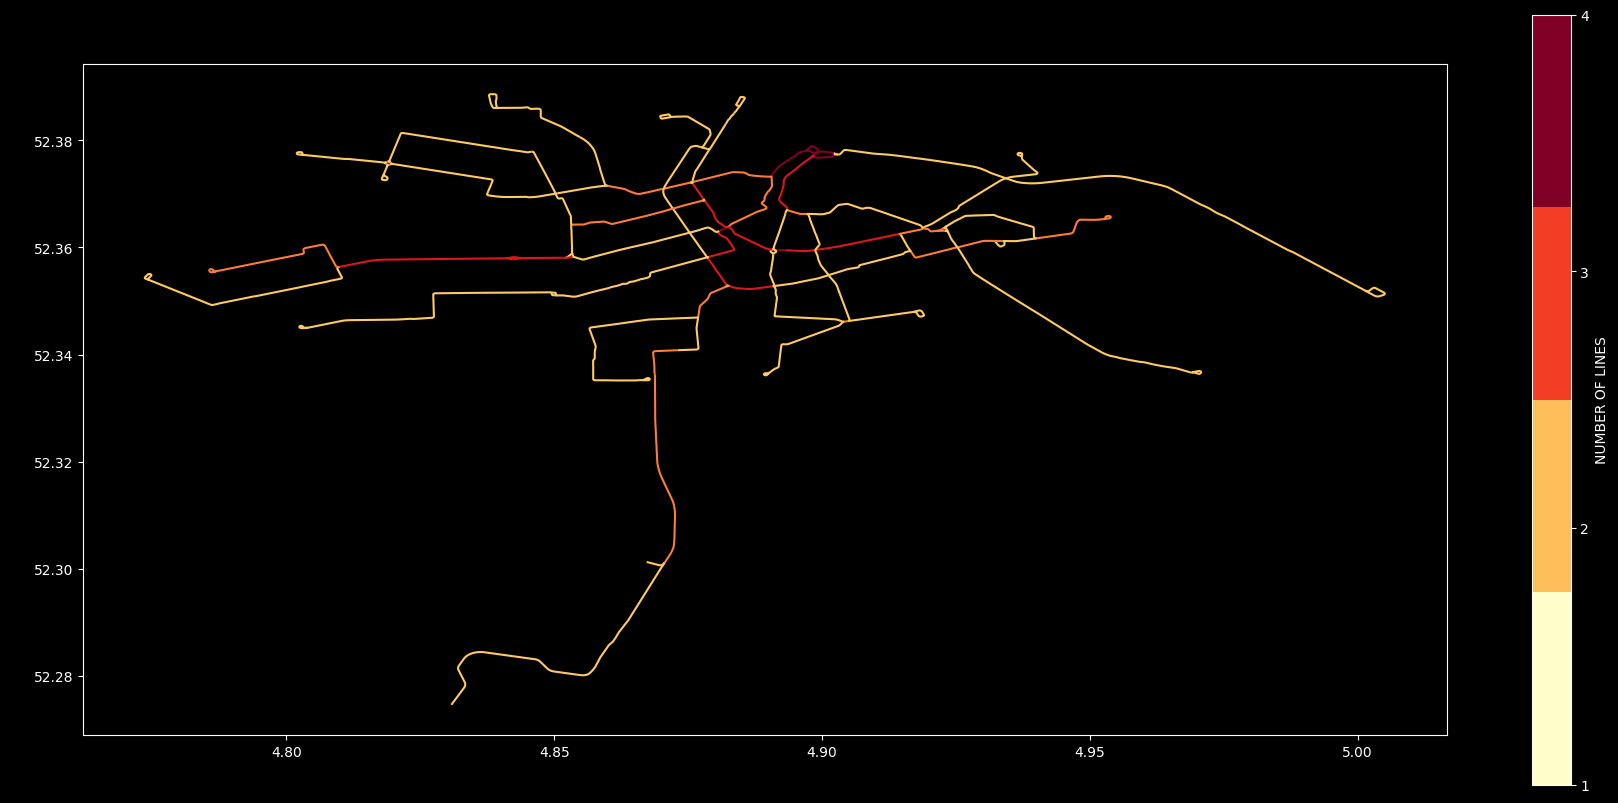

In [396]:
import matplotlib as mpl

#HeatMap

fig, ht_ax = plt.subplots(1, figsize=(12, 12))

YlOrRd= plt.get_cmap('YlOrRd')
color = cm.YlOrRd(np.linspace(0.3, 1, 4)) #create as many colors as there are itineraries

for i in range(len(line_string)):
    ht_gs_ls = gpd.GeoSeries(pd.Series(line_string[i]).apply(shapely.wkt.loads), crs="epsg:4326")

    heatfig = ht_gs_ls.plot(ax=ht_ax, color=color[int(links['count'][i]-1)])
    
ht_gs_p = gpd.GeoSeries(pd.Series(point).apply(shapely.wkt.loads))
heatfig = ht_gs_p.plot(ax=ht_ax, color='black', markersize=7)
fig.set_size_inches(22, 10)

bar_info = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('YlOrRd', 4), norm=plt.Normalize(vmin=1, vmax=4))
#bar_info._A = []
cbar = fig.colorbar(bar_info, ticks=range(5), label='NUMBER OF LINES')


plt.xlabel("Longitude",  {'family':'serif','color':'black','size':14})
plt.ylabel("Latitude",  {'family':'serif','color':'black','size':14})
plt.title("Amsterdam Tram Network Heatmap", {'family':'serif','color':'black','size':20})
plt.savefig('tram_network_heatmap.png', transparent=True)


In [ ]:
# import numpy as np
# import traj_dist.distance as tdist
# import pickle

In [ ]:
# import pickle
# traj_list = pickle.load(open("./traj-dist/data/benchmark_trajectories.pkl", "rb"))[:10]

In [ ]:
# import numpy as np
# import traj_dist.distance as tdist
# import pickle

# traj_list = pickle.load(open("./traj-dist/data/benchmark_trajectories.pkl", "rb"))[:10]
# traj_A = traj_list[0]
# traj_B = traj_list[1]



# # Simple distance

# dist = tdist.sspd(traj_A, traj_B)
# print(dist)

# # Pairwise distance

# pdist = tdist.pdist(traj_list, metric="sspd")
# print(pdist)

# # Distance between two list of trajectories

# cdist = tdist.cdist(traj_list, traj_list, metric="sspd")
# print(cdist)